## Table of Content
 **[Mid-term Project:Supervised Machine Learning](#Mid-term-Project-:-Supervised-Machine-Learning)**
 
 
 <p>The focus of the task is to build predictive models which can identify which employees are at a higer risk of leaving the company. This could help in taking some proactive measures to retain valuable employees. This dataset is collected for a Human resource application and the source is from Kaggle: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition  
    
    Attrition: Represents the measure of employee leave a company voluntorily or involuntorily. HR uses the figure to track and understand how things are going at a company


##  Load Code Libraries

In [1]:
import kaggle
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Part 2: Load Dataset

<p>      </p>

In [2]:
hr = r'C:\Users\Acer\Documents\workspace\ml-zoomcamp\mlzoomcamp-midterm-project\notebooks\data\HR-Employee-Attrition.csv'
df = pd.read_csv(hr)

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
df

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,yes,travel_rarely,1102,sales,1,2,life_sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,no,travel_frequently,279,research_&_development,8,1,life_sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,yes,travel_rarely,1373,research_&_development,2,2,other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,no,travel_frequently,1392,research_&_development,3,4,life_sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,no,travel_rarely,591,research_&_development,2,1,medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,no,travel_frequently,884,research_&_development,23,2,medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,no,travel_rarely,613,research_&_development,6,1,medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,no,travel_rarely,155,research_&_development,4,3,life_sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,no,travel_frequently,1023,sales,2,3,medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# Preprocess the dataset
# Assuming 'Attrition' is the target column; encode it as 0 and 1
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
df['attrition'] = label_encoder.fit_transform(df['attrition'])

# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols.remove('attrition')  # Remove target variable from numeric columns

In [6]:
# Split data into training, validation, and test sets (70% train, 15% validation, 15% test)
from sklearn.model_selection import train_test_split
X = df.drop(columns='attrition')
y = df['attrition']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [9]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
# Transform training data
train_dict = X_train[cat_cols + num_cols].to_dict(orient='records')
X_train_vect = dv.fit_transform(train_dict)

# Transform validation and test sets
val_dict = X_val[cat_cols + num_cols].to_dict(orient='records')
X_val_vect = dv.transform(val_dict)

test_dict = X_test[cat_cols + num_cols].to_dict(orient='records')
X_test_vect = dv.transform(test_dict)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier

In [11]:
# define models and pipeline with StandardScaler
# Wrap models in a pipeline with scaling for numerical features
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])



In [12]:
pac_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', PassiveAggressiveClassifier(random_state=42))
])

In [13]:
# K-Fold Cross-Validation and Baseline AUC Evaluation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
models = {
    'Logistic Regression': logistic_pipeline,
    'Passive-Aggressive': pac_pipeline
}


In [14]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1029, 34)
y_train shape: (1029,)


In [16]:
# Baseline model evaluation with K-Fold
for name, model in models.items():
    cv_auc_scores = cross_val_score(model, X_train_vect, y_train, cv=kfold, scoring='roc_auc')
    print(f"{name} - Mean CV AUC: {np.mean(cv_auc_scores):.4f}")

Logistic Regression - Mean CV AUC: 0.8298
Passive-Aggressive - Mean CV AUC: 0.7503


### Hyperparameter Tunning

In [18]:
# Hyperparameter Tuning with GridSearchCV
param_grid_logistic = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}
param_grid_pac = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__loss': ['hinge', 'squared_hinge']
}

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer
# Define AUC as the scoring metric for tuning
scoring = make_scorer(roc_auc_score)

# GridSearch for Logistic Regression
grid_search_logistic = GridSearchCV(logistic_pipeline, param_grid_logistic, scoring=scoring, cv=kfold, n_jobs=-1)
grid_search_logistic.fit(X_train_vect, y_train)
best_logistic = grid_search_logistic.best_estimator_
print("Best Logistic Regression Parameters:", grid_search_logistic.best_params_)

# GridSearch for Passive-Aggressive Classifier
grid_search_pac = GridSearchCV(pac_pipeline, param_grid_pac, scoring=scoring, cv=kfold, n_jobs=-1)
grid_search_pac.fit(X_train_vect, y_train)
best_pac = grid_search_pac.best_estimator_
print("Best Passive-Aggressive Parameters:", grid_search_pac.best_params_)



Best Logistic Regression Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Best Passive-Aggressive Parameters: {'classifier__C': 0.01, 'classifier__loss': 'hinge'}


In [22]:
# Final Training on Combined Training and Validation Data
X_train_final = np.vstack((X_train_vect, X_val_vect))
y_train_final = np.hstack((y_train, y_val))

# Re-train the best model on the full training + validation set
best_logistic.fit(X_train_final, y_train_final)
best_pac.fit(X_train_final, y_train_final)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 PassiveAggressiveClassifier(C=0.01, random_state=42))])

In [23]:
# Evaluate on Test Set
logistic_test_auc = roc_auc_score(y_test, best_logistic.predict_proba(X_test_vect)[:, 1])
pac_test_auc = roc_auc_score(y_test, best_pac.decision_function(X_test_vect))

print(f"Final Test AUC - Logistic Regression: {logistic_test_auc:.4f}")
print(f"Final Test AUC - Passive-Aggressive Classifier: {pac_test_auc:.4f}")


Final Test AUC - Logistic Regression: 0.8483
Final Test AUC - Passive-Aggressive Classifier: 0.8131


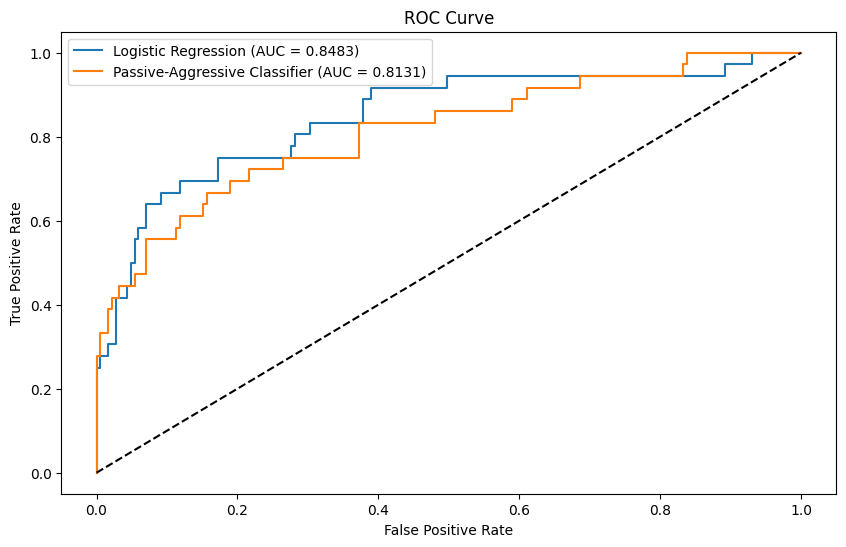

In [24]:
# Plot ROC Curves
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, best_logistic.predict_proba(X_test_vect)[:, 1])
pac_fpr, pac_tpr, _ = roc_curve(y_test, best_pac.decision_function(X_test_vect))

plt.figure(figsize=(10, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_test_auc:.4f})')
plt.plot(pac_fpr, pac_tpr, label=f'Passive-Aggressive Classifier (AUC = {pac_test_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Testing - Using the Model

In [ ]:
employee = {'businesstravel': 'travel_rarely',
 'department': 'sales',
 'educationfield': 'life_sciences',
 'gender': 'female',
 'jobrole': 'sales_executive',
 'maritalstatus': 'single',
 'over18': 'y',
 'overtime': 'no',
 'age': 45,
 'dailyrate': 374,
 'distancefromhome': 20,
 'education': 3,
 'employeecount': 1,
 'employeenumber': 2046,
 'environmentsatisfaction': 4,
 'hourlyrate': 50,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobsatisfaction': 3,
 'monthlyincome': 4850,
 'monthlyrate': 23333,
 'numcompaniesworked': 8,
 'percentsalaryhike': 15,
 'performancerating': 3,
 'relationshipsatisfaction': 3,
 'standardhours': 80,
 'stockoptionlevel': 0,
 'totalworkingyears': 8,
 'trainingtimeslastyear': 3,
 'worklifebalance': 3,
 'yearsatcompany': 5,
 'yearsincurrentrole': 3,
 'yearssincelastpromotion': 0,
 'yearswithcurrmanager': 1,
}

In [ ]:
X_test = dv.transform([employee])
model.predict_proba(X_test)[0, 1]

* Employee details used predicted to remain with the company

In [ ]:
print(list(X_test[0]))

## Save Model

In [25]:
import joblib

In [27]:
# Model Saving for Future Use
joblib.dump(best_logistic, 'best_logistic_model.pkl')
joblib.dump(best_pac, 'best_pac_model.pkl')
joblib.dump(dv, 'dict_vectorizer.pkl')  # Save DictVectorizer to ensure consistent preprocessing


['dict_vectorizer.pkl']